# Introduction to Sympy

In [1]:
!pip install SciencePlots
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.use(['science', 'notebook', 'grid'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for SciencePlots: filename=SciencePlots-1.0.9-py3-none-any.whl size=6484 sha256=3876953c0f6a0eae72f2953a92af9afac811db7c4fe1feed2db6a7d362bbe881
  Stored in directory: /root/.cache/pip/wheels/37/f8/e9/b2f53a40b336388dfc57b108150daff7d6ffbbfc618dba3924
Successfully built SciencePlots


In [2]:
from sympy import *

Let's define a symbolic expression representing mathematical expression $x+2y$

In [3]:
x, y = symbols('x y')

In [4]:
expression = x + 2 * y

In [5]:
display(expression)

x + 2*y

Add '1' to the expression

In [6]:
display(expression + 1)

x + 2*y + 1

In [7]:
display(expression - x)

2*y

In [8]:
display(expression)

x + 2*y

In [9]:
expression.subs({'x': 2, "y": 4})   # subs() substitutes the values from the variables and solves the expression

10

Notice something in the above example. When we typed $expr - x$, we did not get $x + 2 * y - x$, but rather just $ 2 * y $. The $x$ and the $-x$ automatically canceled one another.

This isn’t always the case in SymPy:

In [10]:
display(expression)

x + 2*y

In [11]:
display(x * expression)

x*(x + 2*y)

In [12]:
display(expression * x)

x*(x + 2*y)

Here, you might have expected $x(x+2y)$ to transform into $x^2+2xy$ but instead we see that the expression was left alone. This is a common theme in SymPy. Aside from obvious simplifications like $ x - x = 0$  and $\sqrt8 = 2\sqrt2$ most simplifications are not performed automatically. This is because we might prefer the factored form $x(x+2y)$ or we might prefer the expanded form $x^2 + 2xy$. Both forms are useful in different circumstances. In SymPy, there are functions to go from one form to the other.

In [13]:
expanded = expand(x * expression)

In [14]:
display(expanded)

x**2 + 2*x*y

In [15]:
display(factor(expanded))

x*(x + 2*y)

<img src="https://d1e4pidl3fu268.cloudfront.net/25bdc4be-52ae-4ed3-9971-c1209a2ddd38/14b.crop_935x701_0,0.preview.JPG">

In [16]:
import numpy as np

In [17]:
x, y = symbols('x y')

In [18]:
eq1 = Eq(8*x + y, 42)
eq2 = Eq(x**2-y, 6)
coordinates = solve((eq1, eq2))

In [19]:
print(f"The Solution is {coordinates}")

The Solution is [{x: -12, y: 138}, {x: 4, y: 10}]


# Plot the equation on the Graph and plot the solutions

In [20]:
x_val = np.arange(-15, 12)

In [21]:
y_val_eq1 = [solve(eq1.subs({'x':point}))[0] for point in x_val]

In [22]:
y_val_eq2 =  [solve(eq2.subs({'x':point}))[0] for point in x_val]

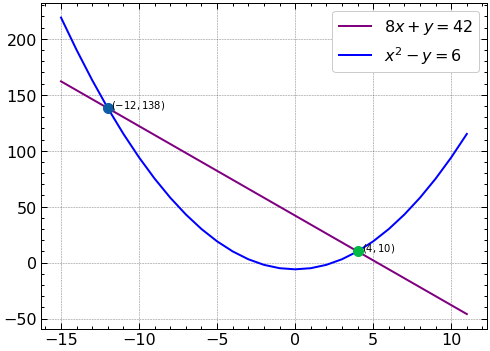

In [23]:
plt.figure(figsize = (8, 6))
plt.plot(x_val, y_val_eq1, label = '$ 8x + y = 42$', color = 'purple')
plt.plot(x_val, y_val_eq2, label = '$ x ^2 - y = 6$', color = 'b')
x_cord = int(coordinates[0].get(x))
y_cord = int(coordinates[0].get(y))
plt.plot(x_cord, y_cord, 'o', ms = 10)
plt.text(x_cord + 0.2, y_cord + 0.9, f"$({x_cord} , {y_cord})$")
x_cord = int(coordinates[1].get(x))
y_cord = int(coordinates[1].get(y))
plt.text(x_cord + 0.3, y_cord + 0.5, f"$({x_cord}, {y_cord})$" )
plt.plot(x_cord, y_cord, 'o', ms = 10)
plt.savefig('solution.png', dpi = 300)
plt.legend(loc = "upper right")
plt.show()

<img src="https://camo.githubusercontent.com/dfb806c0a62e8a79c68b6aa789cf10f4e5bf78dd40c5302eb23c02896d2c0b34/68747470733a2f2f7777772e6f6e6c696e656d6174686c6561726e696e672e636f6d2f696d6167652d66696c65732f73696d756c74616e656f75732d6c696e6561722d7175616472617469632e706e67">